# CC3001 Otoño 2023 Tarea 4
# Generación de código con Árboles Binarios

Luciano Márquez \

Profesores: Iván Sipirán / Nelson Baloian / Patricio Poblete


El objetivo de esta tarea es aprender sobre la manipulación de árboles que representan fórmulas. Hay muchas cosas que uno puede hacer con estos árboles, y en esta tarea nos enfocaremos en particular en algo que los compiladores hacen: la **generación de código** para evaluar fórmulas.

Específicamente, el problema es: dada una fórmula, generar una secuencia de instrucciones elementales que la evalúen. Por ejemplo, dada una fórmula como

```
(a+b)*(c-d)
```

se podría generar código como el siguiente:

```
t1=a+b
t2=c-d
t3=t1*t2
```

Las instrucciones elementales son siempre de la forma ``ti=x op y``, donde ``ti`` es una variable temporal, ``x`` e ``y`` pueden ser variables o números, y ``op`` es un operador. Uno va creando variables ``t1``, ``t2``, ... a medida que las necesita, y la última de ellas es la que almacena el valor final de la fórmula.

Las fórmulas pueden ser arbitrariamente complicadas, como por ejemplo la fórmula

$$
(2-p\,q)\left( \frac{1}{n}+\frac{1}{p+q}\right)
$$

la cual escribimos como

```
(2-p*q)*(1/n+1/(p+q))
```

y cuyo código generado podría ser,

```
t1=p*q
t2=2-t1
t3=1/n
t4=p+q
t5=1/t4
t6=t3+t5
t7=t2*t6
```

El objetivo de esta tarea es que usted implemente una función que, dado un árbol ya construído, lo recorra para generar una secuencia de instrucciones elementales que lo evalúe.

A continuación usted encontrará clases ``Nodoi``, ``Nodoe`` y ``Arbol`` que implementan árboles que representan fórmulas. La clase ``Arbol`` viene con un constructor que recibe un string como parámetro, el cual contiene una fórmula, y este constructor se encarga de transformar la fórmula de string a árbol, de modo que usted no necesita preocuparse de eso. Para simplificar, la fórmula solo podrá contener variables de una sola letra, números de un solo dígito, y sin espacios. Los operadores permitidos son solo suma, resta, multiplicación y división. No hay operador menos unario.

Usted tienen que implementar para la clase ``Arbol`` una función ``codigo`` que al ser invocado genere una secuencia de instrucciones elementales para evaluar la fórmula representada por ese árbol, y la retorne en forma de una lista (de Python).

In [ ]:
# Ejecutar esto para poder visualizar los árboles

!pip install aed-utilities

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for aed-utilities: filename=aed_utilities-0.5.6-py3-none-any.whl size=4542 sha256=b8406fc850712a23d121226772fe980f5e89f583f5a5fd6f4dedd1fd2ac3ebcb
  Stored in directory: /root/.cache/pip/wheels/db/6d/39/cc766f956b1e504722228ad30c8154cd48f4470e7e24dcfd0e
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=df10a3b1d2038c677d073c941caa94fe38d78dce388e3b628c9d49ab824ab0a4
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built aed-utilities validators


In [ ]:
import aed_utilities as aed

class Nodoi:
    def __init__(self, izq, info, der, t_like = False):
        self.izq=izq
        self.info=info
        self.der=der
        self.t_like = t_like

    def tipo(self):
        return "i"

    def codigo(self):
        global r
        global t

        if self.izq.t_like == True and self.der.t_like == True: #se llega a un nodo del tipo (a op b), (t_i op a), (a op t_i) o (t_i op t_i)
          t += 1 #el contador de variables t_i aumenta pues se requiere una nueva
          r.append(f"t{t}={self.izq.info}{self.info}{self.der.info}") #se agrega un nuevo término a r
          self.info = f"t{t}" #se cambia la info del nodo a la variable que se acaba de crear para la proxima vez que se lea el nodo
          self.t_like = True #se actualiza el valor para afirmar que ahora el nodo si es de la forma t_i
        else: #el nodo actual no tienen ninguna de las formas anteriores
          if self.izq.t_like == False: #el nodo izq es el problema
            self.izq.codigo() #lo agregamos y hacemos de la forma que queremos
          if self.der.t_like == False: #el nodo derecho es el problema
            self.der.codigo() #lo agregamos y hacemos de la forma que queremos
          self.codigo() #ya arreglado el problema probamos otra vez con el actual nodo


class Nodoe:
    def __init__(self, info, t_like = True):
        self.info=info
        self.t_like = t_like  #un nodo externo se le trata como nodo interior con info t_i

    def tipo(self):
        return "e"



class Arbol:
    def __init__(self,formula):
        global k
        global s
        s=formula+";" # agregamos una marca de fin de la entrada
        k=0 # indica próximo caracter por procesar
        # definimos funciones para analizar la fórmula
        def expresion(): # retorna puntero a la raíz de un árbol que representa a la fórmula s
            global k
            global s
            a=factor()
            while s[k]=="+" or s[k]=="-":
                op=s[k]
                k+=1
                b=factor()
                a=Nodoi(a,op,b)
            return a
        def factor():
            global k
            global s
            a=termino()
            while s[k]=="*" or s[k]=="/":
                op=s[k]
                k+=1
                b=termino()
                a=Nodoi(a,op,b)
            return a
        def termino(): # posible constante, variable o formula parentizada
            global k
            global s
            if s[k].isalpha() or s[k].isdigit():
                a=Nodoe(s[k])
                k+=1
                return a
            if s[k]=="(": # fórmula parentizada
                k+=1
                a=expresion()
                if s[k]!=")":
                    print("Error: Falta cierra paréntesis: "+formula[k:])
                    assert False
                k+=1
                return a
            print("Error: Falta variable, número o abre paréntesis: "+formula[k:])
            assert False

        a=expresion()
        if s[k]!=";":
            print("Error: Basura al final de la fórmula: "+formula[k:])
            assert False
        self.raiz=a

    def codigo(self):
        global r #lista con la respuesta
        global t #cuenta de cuantas t(ecuaciones) hay

        r = []
        t = 0

        n0 = self.raiz

        if n0.tipo() == "e": #caso el arbol es un nodo externo de la forma (a)
          r = [f"t1={n0.info}"]
        elif n0.der.tipo() == "e" and n0.izq.tipo() == "e": #caso el arbol es de solo un nodo interno
          r = [f"t1={n0.izq.info}{n0.info}{n0.der.info}"]
        else:
          n0.codigo() #se ejecuta codigo desde la raiz

        return r


    def dibujar(self):
      btd = aed.BinaryTreeDrawer(fieldData="info", fieldLeft="izq", fieldRight="der", classNone=Nodoe)
      btd.draw_tree(self, "raiz")

A continuación probamos esta funcionalidad con varias fórmulas de ejemplo. Para ver si el árbol fue construido correctamente, lo dibujamos.

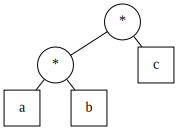

In [ ]:
Arbol("a*b*c").dibujar()

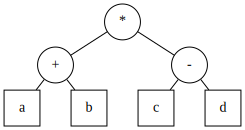

In [ ]:
Arbol("(a+b)*(c-d)").dibujar()

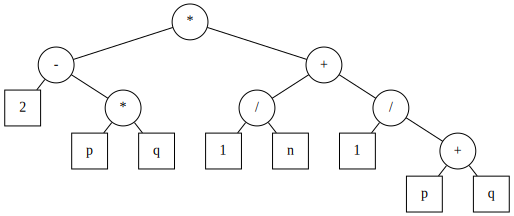

In [ ]:
Arbol("(2-p*q)*(1/n+1/(p+q))").dibujar()

## Resultados

En esta sección probamos la generación de código que usted tiene que escribir. Mientras usted no sustituya la función ``codigo`` provisoria que viene en la definición de la clase, va a aparecer la lista que generamos ahí. Primero vamos a definir una función ``probar`` que genera el código a partir de una fórmula dada e imprime el resultado:

In [ ]:
def probar(formula):
    a=Arbol(formula)
    a.dibujar()#agregamos el dibujo del arbol para facilitar la comprobación con apoyo visual
    for x in a.codigo():
        print(x)

A continuación probamos con varias fórmulas. Además de las fórmulas dadas, usted tiene que agregar tres ejemplos adicionales.

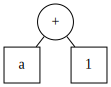

t1=a+1


In [ ]:
probar("a+1")

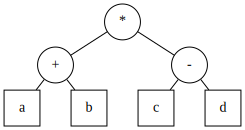

t1=a+b
t2=c-d
t3=t1*t2


In [ ]:
probar("(a+b)*(c-d)")

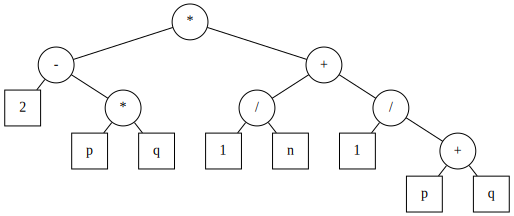

t1=p*q
t2=2-t1
t3=1/n
t4=p+q
t5=1/t4
t6=t3+t5
t7=t2*t6


In [ ]:
probar("(2-p*q)*(1/n+1/(p+q))")

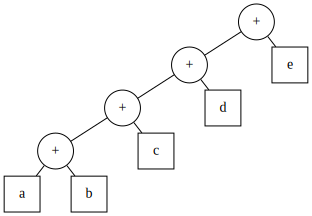

t1=a+b
t2=t1+c
t3=t2+d
t4=t3+e


In [ ]:
probar("((((a+b)+c)+d)+e)")

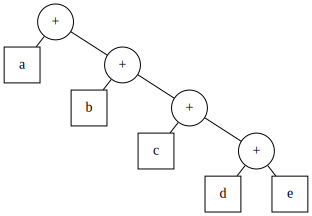

t1=d+e
t2=c+t1
t3=b+t2
t4=a+t3


In [ ]:
probar("(a+(b+(c+(d+e))))")

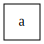

t1=a


In [ ]:
probar("a")

Formulas adicionales:

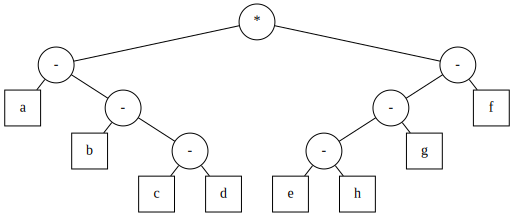

t1=c-d
t2=b-t1
t3=a-t2
t4=e-h
t5=t4-g
t6=t5-f
t7=t3*t6


In [ ]:
probar("(a-(b-(c-d)))*((((e-h)-g)-f))")

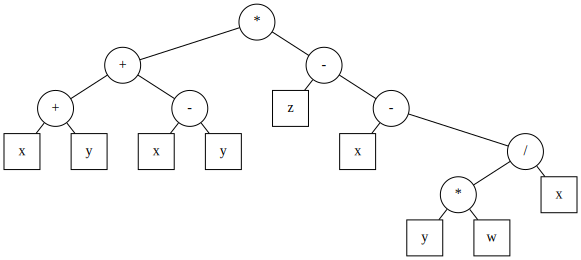

t1=x+y
t2=x-y
t3=t1+t2
t4=y*w
t5=t4/x
t6=x-t5
t7=z-t6
t8=t3*t7


In [ ]:
probar("((x+y)+(x-y))*(z-(x-y*w/x))")

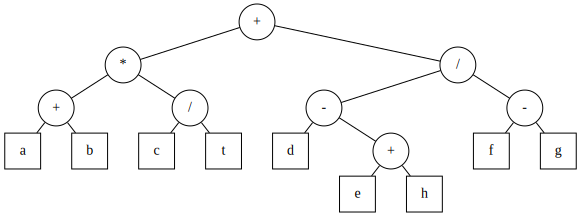

t1=a+b
t2=c/t
t3=t1*t2
t4=e+h
t5=d-t4
t6=f-g
t7=t5/t6
t8=t3+t7


In [ ]:
probar("((a+b)*(c/t))+((d-(e+h))/(f-g))")